In [36]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import requests
import pprint
import hvplot.pandas
import pprint

# API KEYS
from api_keys import geoapify_key

# Read CSV
crime_data_df = pd.read_csv("../Resources/hate_crime.csv", low_memory=False)

In [37]:
# Define a function to be used later for making bar charts
def make_bar():
    plt.figure(figsize=(15, 8))
    color = mpl.cm.cool(np.linspace(.1, 1, 31))
    plt.rcParams['axes.facecolor'] = 'lightcyan'
    plt.bar(x, y, align='center',color=color, edgecolor="black", width= .5, linewidth=2.5)
    
    plt.xticks(x, rotation='vertical')
    plt.title(title)
    plt.xlabel(xl)
    plt.ylabel(yl)   

In [38]:
# Define a function to be used later for making pie charts
def make_pie():
    fig = plt.figure()
    fig.patch.set_facecolor('lightcyan')
    
    global labels
    global e

    # labels = x.index.values
    colors = ['#33F6FF','#33A5FF','#8033FF','#C733FF','#F633FF']
    wp = { 'linewidth' : 1, 'edgecolor' : "black"}  
    
    plt.pie(x, labels=labels, colors=colors,wedgeprops = wp, explode= e, \
        autopct='%1.1f%%',pctdistance=0.78,startangle=90,shadow=True, radius=1000,labeldistance=1.1)
    plt.title(title)
    plt.axis('equal')
    plt.tight_layout() 

In [39]:
# Define a function to reindex the months in order from Jan - Dec
def rdex1():
    global recount1
    recount1 = counts.reindex(index=["JAN",'FEB','MAR', 'APR','MAY','JUN','JUL','AUG', 'SEP','OCT','NOV','DEC'])

# Define a function to reindex the days in order from 1 - 31
def rdex2():
    global recount2
    recount2 = counts.reindex(index=["01",'02','03', '04','05','06','07','08', '09','10','11','12',"13",'14','15',\
                                '16','17','18','19','20', '21','22','23','24','25','26','27','28','29','30','31'])

In [41]:
# Dropping columns that will not be used
clean_crime = crime_data_df.drop(columns=["ORI", "PUB_AGENCY_UNIT", "JUVENILE_VICTIM_COUNT","ADULT_VICTIM_COUNT", "ADULT_OFFENDER_COUNT", 'JUVENILE_OFFENDER_COUNT', "POPULATION_GROUP_CODE", "POPULATION_GROUP_DESC", "LOCATION_NAME", "DIVISION_NAME"]).copy()

# Dropping "Guam", "Federal", "District of Columbia" from State df
state_drop = ["Guam", "Federal", "District of Columbia"]
clean_crime[~clean_crime["STATE_NAME"].isin(state_drop)].copy()

# Cleaning OFFENSE_NAME to show MAIN_OFFENSE
clean_crime[["MAIN_OFFENSE","SUB_OFFENSE"]] = clean_crime["OFFENSE_NAME"].str.split('/', n=1, expand= True)
clean_crime["MAIN_OFFENSE"] = clean_crime["MAIN_OFFENSE"].str.split(';', n=1, expand= True)

# Separating INCIDENT_DATE to show "DATA_DAY","DATA_MONTH" and "YEAR"
clean_crime[["DATA_DAY","DATA_MONTH", "YEAR"]]= clean_crime['INCIDENT_DATE'].str.split("-", n = 2, expand = True)  

# Dropping unused columns
final_crime_df = clean_crime.drop(columns=["OFFENSE_NAME", "SUB_OFFENSE", "YEAR", "INCIDENT_DATE"])
clean_crime['OFFENDER_RACE'] = clean_crime['OFFENDER_RACE'].replace(['American Indian or Alaska Native', 'Asian' , 'Native Hawaiian or Other Pacific Islander'],'AAPI').copy()

# Building final DataFrame
final_crime_df= clean_crime[['STATE_NAME','STATE_ABBR','PUB_AGENCY_NAME','MAIN_OFFENSE',"DATA_MONTH","DATA_DAY",'DATA_YEAR','BIAS_DESC','OFFENDER_RACE']]


In [42]:
# peak_year = final_crime_df[final_crime_df['DATA_YEAR'] == 2001]
# max_state = peak_year[peak_year['STATE_NAME'] == "California"]
# offenses = max_state['MAIN_OFFENSE'].value_counts().nlargest(5)

# x = final_crime_df["OFFENDER_RACE"].value_counts().nlargest(5)

# plt.bar(x= x)

Which hate crime was most prevalent?



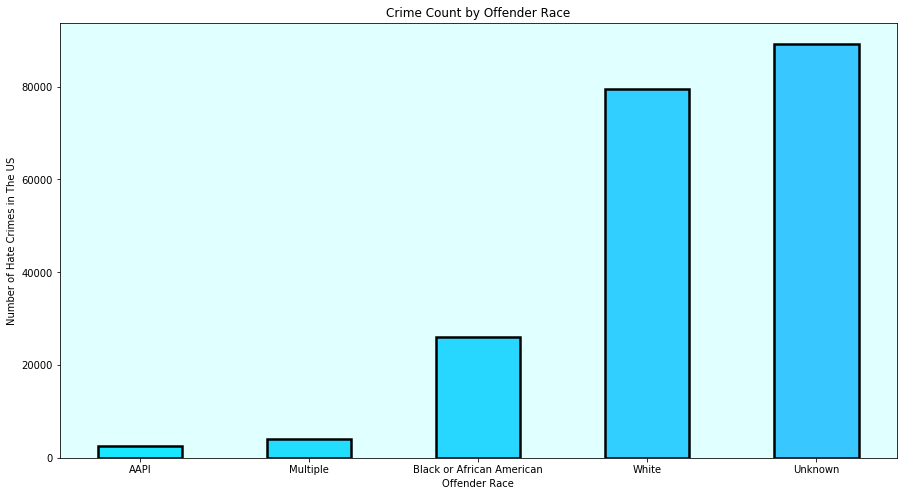

In [43]:
offender_race = final_crime_df['OFFENDER_RACE'].value_counts().sort_values(ascending= True)

x = offender_race.index.values
y = offender_race.values
# h = ""
title="Crime Count by Offender Race"
xl = 'Offender Race'
yl = 'Number of Hate Crimes in The US'
make_bar()

plt.xticks(x, rotation= 0)
plt.show()

In [ ]:
labels = crime_type.index.values
colors = ['#33F6FF','#33A5FF','#8033FF','#C733FF','#F633FF']
e = (80, 30, 30, 30, 30)
wp = { 'linewidth' : 1, 'edgecolor' : "black"}  
    
# plt.pie(x, labels=labels, colors=colors,wedgeprops = wp, explode= e, \
#         autopct='%1.1f%%',pctdistance=0.78,startangle=90,shadow=True, radius=1000,labeldistance=1.1)
# plt.title(title)
# plt.axis('equal')
# plt.legend(title="técnica")
# plt.tight_layout() 
# plt.show()

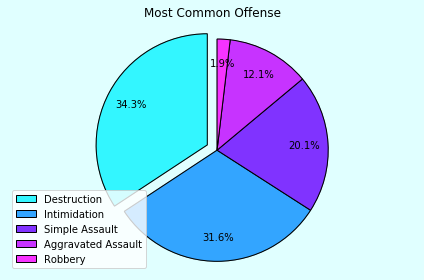

In [ ]:
crime_type = final_crime_df['MAIN_OFFENSE'].value_counts().nlargest(5)
x = crime_type.values
labels = None
legend = crime_type.index.values

title= "Most Common Offense"
xl = 'Offense Type'
yl = 'Crime Count'

e = (100, 0, 0, 0, 0)

make_pie()

plt.legend(legend, loc="lower left")
plt.show()



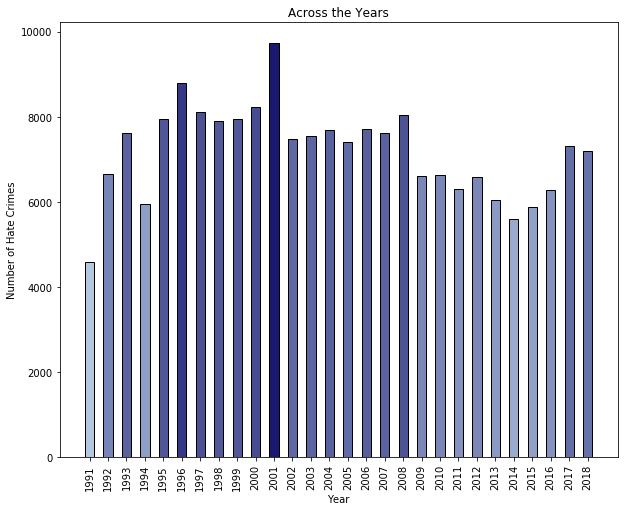

In [ ]:
year_counts = final_crime_df['DATA_YEAR'].value_counts().sort_values(ascending= True)
x = year_counts.index.values
ys = year_counts.values

plt.figure(figsize=(10, 8))

cmap = mcolors.LinearSegmentedColormap.from_list("", ["aliceblue", "lightsteelblue", "midnightblue"])

plt.bar(x, ys, align='center', color= cmap(year_counts.values/year_counts.values.max()), edgecolor = "black", width = .5, linewidth = 1)

plt.title("Across the Years")
plt.xlabel('Year')
plt.ylabel('Number of Hate Crimes')
plt.xticks(x, rotation='vertical')
plt.show()

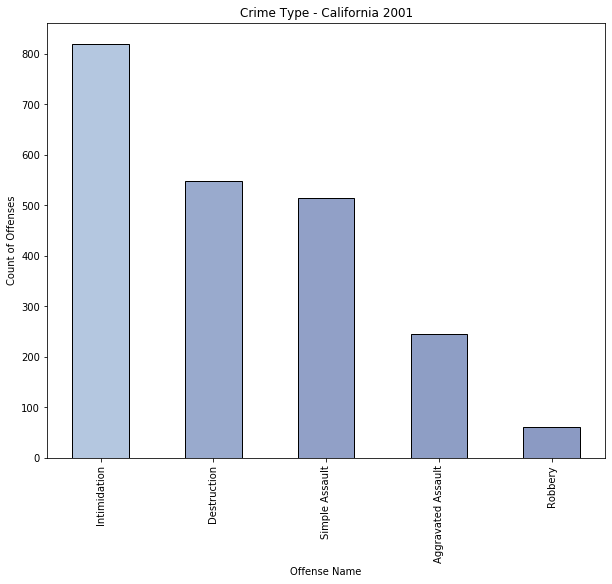

In [ ]:
# Changing it to be top 5

x = offenses.index.values
y = offenses.values

plt.figure(figsize=(10, 8))

plt.bar(x, y, align='center', color= cmap(year_counts.values/year_counts.values.max()), edgecolor = "black", width = .5, linewidth = 1)

plt.title("Crime Type - California 2001")
plt.xlabel('Offense Name')
plt.ylabel('Count of Offenses')
plt.xticks(x, rotation='vertical')
plt.show()

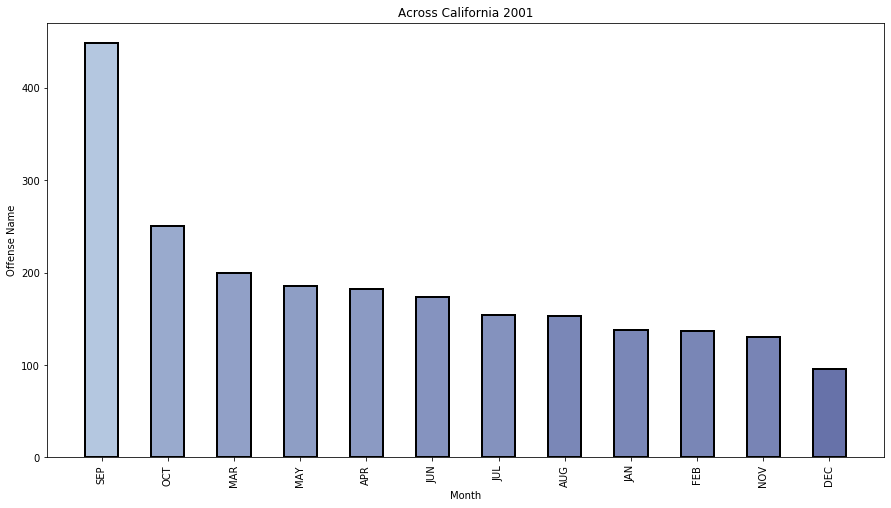

In [ ]:
counts = max_state['DATA_MONTH'].value_counts()
x = counts.index.values
y = counts.values

plt.figure(figsize=(15, 8))

plt.bar(x, y, align='center', color=cmap(year_counts.values/year_counts.values.max()), edgecolor="black", width= .5, linewidth=2)

plt.title("Across California 2001")
plt.xlabel('Month')
plt.ylabel('Offense Name')
plt.xticks(x, rotation='vertical')
plt.show()

In [ ]:
# # Gathering LAT and LNG for each location to use in map

# # Locations to use in loop
# state_unique = final_crime_df["STATE_NAME"].unique()
# city_unique = final_crime_df["PUB_AGENCY_NAME"].unique()

# # Set the API base URL
# url = "https://api.geoapify.com/v1/geocode/search?country=United%20States%20of%20America"

# # Define an empty list for data for each location
# state_data = []
# # city_data = []

# # Print to logger
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# # Loop through all the cities in our list to fetch lat and lon
# for state in state_unique:

#     # Create endpoint URL with each state
#     state_url = url + "&state="+ state + "&apiKey=" + geoapify_key
    
#     print(f"Processing Record for {state}")

#     # Run an API request for each of the states
#     try:
#         # Parse the JSON and retrieve data
#         state_info = requests.get(state_url).json()

#         # Parse out latitude, longitude
#         state_lat = state_info["features"][0]["properties"]["lat"]
#         state_lng = state_info["features"][0]["properties"]["lon"]

#         # Append the State information into state_data list
#         state_data.append({"State": state, 
#                           "Lat": state_lat, 
#                           "Lng": state_lng})
# # If an error is experienced, skip the state
#     except:
#         pass
# for i, city in zip(range(10),city_unique):

#     # Create endpoint URL with each city
#     city_url = url + "&city="+ city + "&apiKey=" + geoapify_key
#     print(f"Processing Record for {city}")
#     try:
#         # Parse the JSON and retrieve data
#         city_info = requests.get(city_url).json()

#         # Parse out latitude, longitude
#         city_lat = city_info["features"][0]["properties"]["lat"]
#         city_lng = city_info["features"][0]["properties"]["lon"]
#         city_state = city_info["features"][0]["properties"]["state"]

#         # Append the City information into city_data list
#         state_data.append({"City": city, 
#                           "Lat": city_lat, 
#                           "Lng": city_lng})
# # If an error is experienced, skip the city
#     except:
#         pass
              
# # Indicate that Data Loading is complete 
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")

In [ ]:
# state_data_df = pd.DataFrame(state_data) 
# state_data_df.head(80)

In [ ]:
# # Showing top 10 offenses
# offense_count = final_crime_df["MAIN_OFFENSE"].value_counts().nlargest(10)
# offense_clean = offense_count.reset_index()
# offense_clean = offense_clean.rename(columns={"index": "OFFENSE_NAME", "OFFENSE_NAME" : "OFFENSE_COUNT"})
# offense_clean.plot(kind= "bar", x = offense_clean["MAIN_OFFENSE"], color = "r")
# # offense_clean

In [ ]:
# #  Thinking of finding the mean crime rate for each state to add to map
# y = final_crime_df[["STATE_NAME", 'DATA_YEAR','INCIDENT_DATE', 'STATE_ABBR', 'PUB_AGENCY_NAME','OFFENSE_NAME']]
# f = y.groupby("STATE_NAME")['OFFENSE_NAME'].sort_values(ascending = False)
# f
# # incident_count = f.reset_index()
# incident_count



In [ ]:
# Configure the map plot
map_hotel = state_data_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    color = "State",
    alpha = 0.5,
    # size = incident_count["OFFENSE_NAME"]
    )

# Display the map
map_hotel

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (State)

In [ ]:
peak_year.head()

,STATE_NAME,DATA_YEAR,INCIDENT_DATE
73729,Alaska,2001,14-JAN-01
73730,Alaska,2001,14-JAN-01
73731,Alaska,2001,14-JAN-01
73732,Alaska,2001,14-JAN-01
73733,Alaska,2001,14-JAN-01


In [ ]:
# new_index = date_df.index.to_series().str.split("-").str[1:].str.join("-")
# df.groupby<new_index).sum()

In [ ]:
# (x.unique())

array(['Alaska', 'Arkansas', 'Arizona', 'California', 'Colorado',
       'Connecticut', 'District of Columbia', 'Delaware', 'Florida',
       'Georgia', 'Iowa', 'Idaho', 'Illinois', 'Indiana', 'Kansas',
       'Kentucky', 'Louisiana', 'Massachusetts', 'Maryland', 'Maine',
       'Michigan', 'Minnesota', 'Missouri', 'Mississippi', 'Montana',
       'Nebraska', 'North Carolina', 'North Dakota', 'New Hampshire',
       'New Jersey', 'New Mexico', 'Nevada', 'New York', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Virginia', 'Vermont', 'Washington', 'Wisconsin', 'West Virginia',
       'Wyoming'], dtype=object)

In [ ]:
# Statetypes = clean_crime[["STATE_NAME", 'OFFENSE_NAME']].copy()